**<span style="font-size: 24px;">Тема: Искусственный нейрон и однослойный перцептрон</span>**

**<span style="font-size: 18px;">Искусственный нейрон</span>**

Искусственный нейрон — это математическая модель, имитирующая работу биологического нейрона. Он получает на вход набор значений $x_1, x_2, \dots, x_n$, умножает каждый вход на соответствующий вес $w_1, w_2, \dots, w_n$, добавляет смещение $b$ и пропускает полученную сумму через функцию активации.

**Формула работы нейрона:**
$$ y = f(w_1 x_1 + w_2 x_2 + \dots + b) $$
где:
- $w$ — весовые коэффициенты,
- $b$ — смещение (bias),
- $f$ — функция активации (например, сигмоида, ReLU, гиперболический тангенс).

**<span style="font-size: 18px;">Однослойный перцептрон</span>**

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов. Каждый нейрон обрабатывает несколько входных признаков и выдаёт один выходной сигнал. Если в слое несколько нейронов, их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи **линейной классификации**, то есть разделять данные, которые можно разделить прямой линией (в двумерном пространстве) или гиперплоскостью (в многомерном пространстве).

**<span style="font-size: 18px;">Ограничения</span>**

Однако перцептрон **не может решить задачи, где классы разделяются нелинейно** — классическим примером является логическая операция XOR.

**<span style="font-size: 18px;">Правило обучения перцептрона</span>**

Обучение происходит по следующему правилу обновления весов:
$$ w = w + \eta \cdot (y_{\text{ист}} - y_{\text{пр}}) \cdot x $$
где:
- $\eta$ — скорость обучения,
- $y_{\text{ист}}$ — истинное значение,
- $y_{\text{пр}}$ — предсказанное значение.

Таким образом, перцептрон корректирует веса только в случае ошибочного предсказания, постепенно улучшая свою способность различать классы.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

**<span style="font-size: 20px;">№1. Реализация функций активации</span>**

In [31]:
def sigmoid(z):
    """Сигмоидная функция активации (логистическая функция)."""
    return 1 / (1 + np.exp(-z))

def threshold(z):
    """Пороговая функция активации (единичный скачок)."""
    return 1 if z >= 0 else 0

def tanh(z):
    """Гиперболический тангенс."""
    posterm, negterm = np.exp(z), np.exp(-z)
    return (posterm - negterm) / (posterm + negterm)

def arctan(z):
    """Арктангенс."""
    return np.arctan(z)

def neuron_output(X, w, b):
    """Вычисляет линейную комбинацию входов."""
    z = np.dot(X, w) + b
    return z

In [32]:
SIZE = 100
SEED = 45

In [33]:
np.random.seed(SEED)

# Генерируем два гауссовых облака точек
cluster_negative = np.random.randn(SIZE, 2) + np.array([-2, -2])  # класс 0
cluster_positive = np.random.randn(SIZE, 2) + np.array([2, 2])    # класс 1

# Объединяем данные и создаем метки
X = np.vstack((cluster_negative, cluster_positive))
y = np.array([0]*SIZE + [1]*SIZE)  # Метки классов

In [34]:
w = np.random.randn(2)
b = 0.0

outputs = sigmoid(neuron_output(X, w, b))
y_pred = (outputs > 0.5).astype(int)

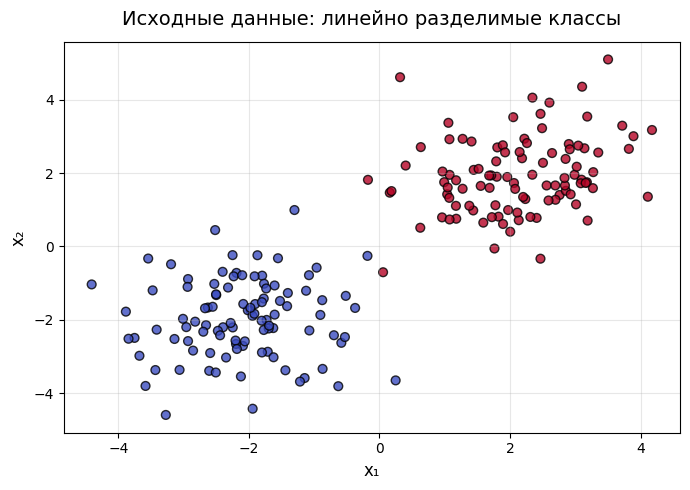

In [35]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=40, alpha=0.8, edgecolor='k')
plt.title('Исходные данные: линейно разделимые классы', fontsize=14, pad=12)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
def plot_decision_boundary(w, b, f=lambda x: x, threshold=0.0, ax=None, fname='тождественная'):
    """
    Визуализирует границу решений перцептрона.
    
    Параметры:
    w - веса перцептрона
    b - смещение перцептрона
    f - функция активации
    threshold - порог классификации
    ax - оси matplotlib (если None, создается новый график)
    fname - имя функции активации для заголовка
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    Z = f(neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b))
    Z = np.array([1 if z >= threshold else 0 for z in Z])
    Z = Z.reshape(xx.shape)

    if ax is None:
        plt.figure(figsize=(7, 5))
        plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
        # Добавляем контур границы
        plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
        plt.title(f'Граница решений\nФункция активации: {fname}', fontsize=14, pad=12)
        plt.xlabel('x₁', fontsize=12)
        plt.ylabel('x₂', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
        ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1.5)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
        ax.set_title(f'Граница решений\nФункция: {fname}', fontsize=12, pad=10)
        ax.set_xlabel('x₁', fontsize=11)
        ax.set_ylabel('x₂', fontsize=11)
        ax.grid(True, alpha=0.3)

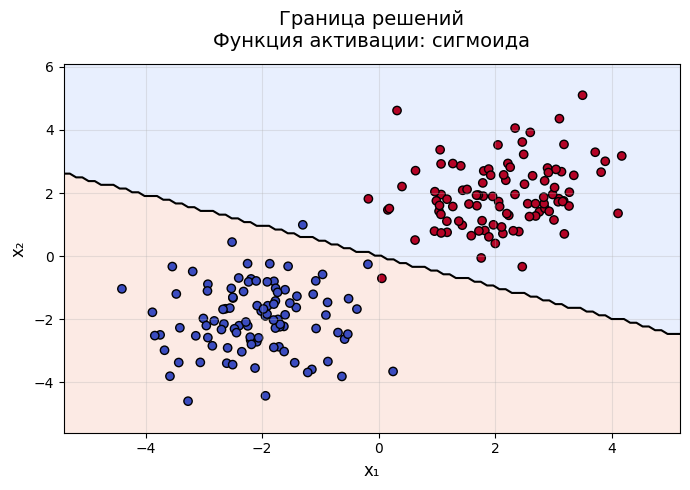

In [37]:
plot_decision_boundary(w, b, sigmoid, 0.5, None, 'сигмоида')

In [38]:
LEARNING_RATE = 0.1
EPOCHS = 10

**<span style="font-size: 16px;">Метод для обучения однослойного перцептрона на указанном датасете с функцией активации и порогом бинарной классификации</span>**

In [39]:
def train_perceptron(w, b, x, y, f=lambda x: x, threshold=0.0, verbose=True):
    """
    Обучает однослойный перцептрон.
    
    Параметры:
    w - веса перцептрона
    b - смещение перцептрона
    x - обучающий датасет
    y - бинарные метки (0 или 1)
    f - функция активации
    threshold - порог классификации
    verbose - вывод информации о процессе
    """
    losses = []
    
    if verbose:
        print(f"\n{' НАЧАЛО ОБУЧЕНИЯ ':-^40}")
        print(f"Скорость обучения: {LEARNING_RATE}")
        print(f"Количество эпох: {EPOCHS}")
        print("-" * 40)
    
    for epoch in range(EPOCHS):
        for i in range(len(x)):
            # Прямой проход
            z = f(np.dot(x[i], w) + b)
            y_pred = 1 if z >= threshold else 0
            
            # Вычисление ошибки
            error = y[i] - y_pred
            
            # Обновление весов
            w += LEARNING_RATE * error * x[i]
            b += LEARNING_RATE * error
        
        # Оценка точности после эпохи
        preds = np.array([1 if f(np.dot(el, w) + b) >= threshold else 0 for el in x])
        acc = (preds == y).mean()
        losses.append(1 - acc)
        
        if verbose and (epoch < 3 or epoch == EPOCHS - 1):
            print(f"Эпоха {epoch+1:2d}/{EPOCHS} | "
                  f"Точность: {acc:.4f} | "
                  f"Ошибок: {int((1-acc)*len(x)):3d}")
    
    if verbose:
        print("-" * 40)
        print(f"Финальная точность: {acc:.4f}")
        print(f"Обученные веса: w = [{w[0]:.4f}, {w[1]:.4f}], b = {b:.4f}")
    
    return w, b, losses

**<span style="font-size: 20px;">2. Изучение влияния функции активации на поведение перцептрона</span>**

**<span style="font-size: 16px;">Обучаем перцептрон с разными функциями активации 100 раз и выводим графики границ решений для последних.</span>**


----------- НАЧАЛО ОБУЧЕНИЯ ------------
Скорость обучения: 0.1
Количество эпох: 10
----------------------------------------
Эпоха  1/10 | Точность: 0.9950 | Ошибок:   1
Эпоха  2/10 | Точность: 0.9950 | Ошибок:   1
Эпоха  3/10 | Точность: 0.9950 | Ошибок:   1
Эпоха 10/10 | Точность: 1.0000 | Ошибок:   0
----------------------------------------
Финальная точность: 1.0000
Обученные веса: w = [0.4013, 0.1624], b = 0.1000

----------- НАЧАЛО ОБУЧЕНИЯ ------------
Скорость обучения: 0.1
Количество эпох: 10
----------------------------------------
Эпоха  1/10 | Точность: 0.9950 | Ошибок:   1
Эпоха  2/10 | Точность: 0.9950 | Ошибок:   1
Эпоха  3/10 | Точность: 0.9950 | Ошибок:   1
Эпоха 10/10 | Точность: 1.0000 | Ошибок:   0
----------------------------------------
Финальная точность: 1.0000
Обученные веса: w = [0.4155, 0.1427], b = 0.1000

----------- НАЧАЛО ОБУЧЕНИЯ ------------
Скорость обучения: 0.1
Количество эпох: 10
----------------------------------------
Эпоха  1/10 | Точность: 0.99

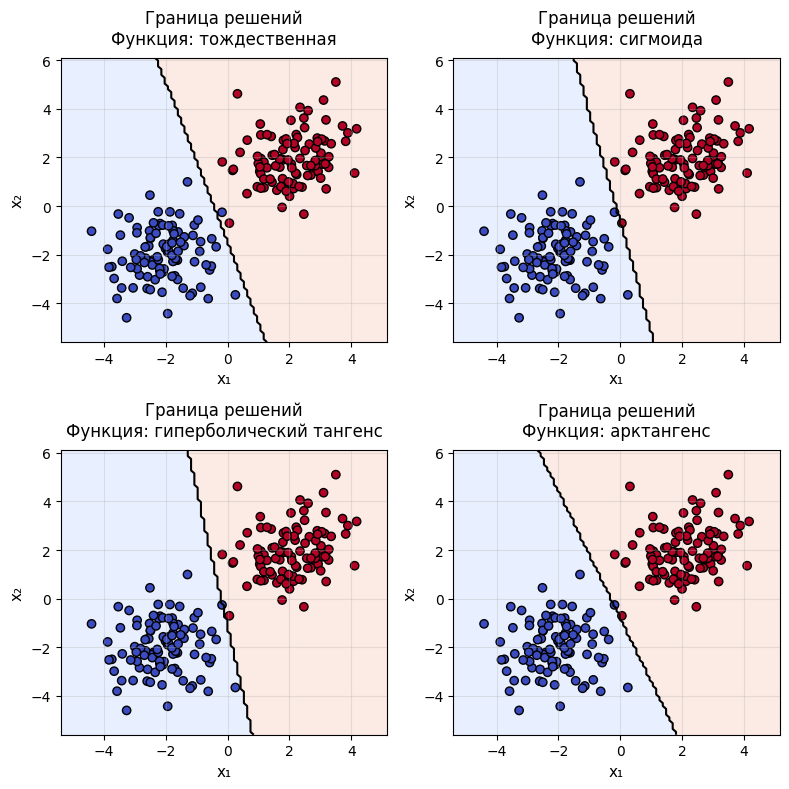

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

losses = []
fnames = ['тождественная', 'сигмоида', 'гиперболический тангенс', 'арктангенс']
for i, (f, thr) in enumerate([(lambda x: x, 0.0), 
                                     (sigmoid, 0.5), 
                                     (tanh, 0.0), 
                                     (arctan, 0.0)]):
    # повторяем эксперимент 100 раз для надёжности сравнения
    # (чтобы быть менее зависимым от случая)
    for _ in range(100):
        w = np.random.randn(2)
        b = 0.0
        w, b, loss = train_perceptron(w, b, X, y, f, thr)

        if len(losses) == i:
            losses.append(loss)
        else:
            losses[i] = [loss[j] + losses[i][j] for j in range(len(losses[i]))]
    else:
        plot_decision_boundary(w, b, f, thr, ax[i//2, i%2], fnames[i])
        # усредняем ошибку
        losses[i] = [losses[i][j] / 100 for j in range(len(losses[i]))]

plt.tight_layout();

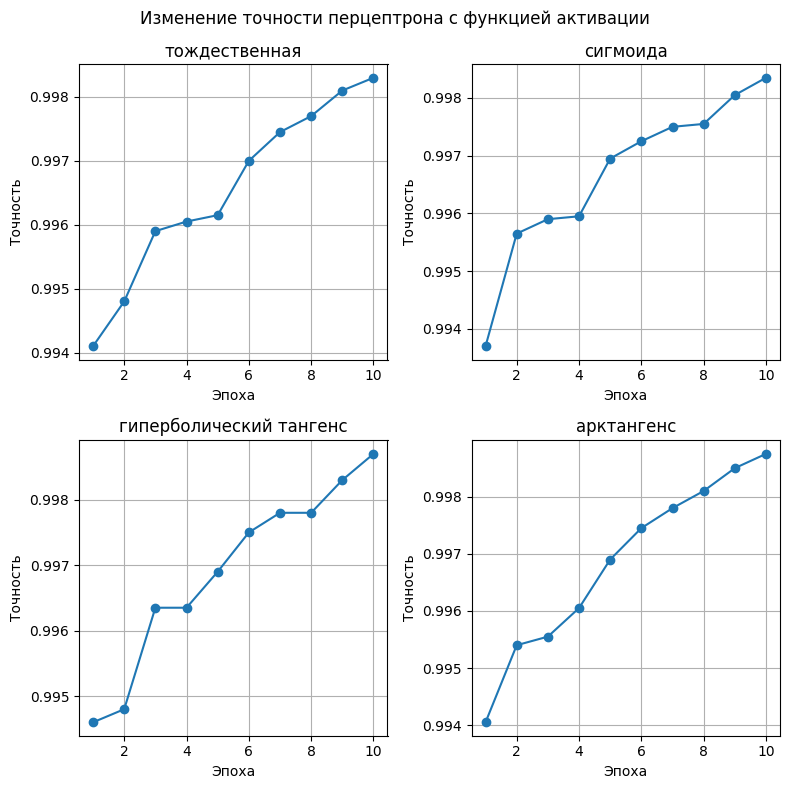

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.suptitle('Изменение точности перцептрона с функцией активации')
for i in range(4):
    ax[i//2, i%2].plot(range(1, EPOCHS + 1), [1 - l for l in losses[i]], marker='o')
    ax[i//2, i%2].set_title(fnames[i])
    ax[i//2, i%2].set_xlabel('Эпоха')
    ax[i//2, i%2].set_ylabel('Точность')
    ax[i//2, i%2].grid(True)
    
plt.tight_layout();

In [42]:
# точность на последней эпохе
print(*[round(1 - losses[i][-1], 6) for i in range(len(losses))])

0.9983 0.99835 0.9987 0.99875


In [43]:
# средняя точность за первые 4 эпохи
print(*[round(sum(1 - losses[i][j] for j in range(4)) / 4, 6) for i in range(len(losses))])

0.995212 0.9953 0.995525 0.995262


По графикам точности можно заметить, что в среднем точность на последней эпохе расположена по возрастанию - от тождественной к арктангенсу.

В первые 4 эпохи лучшая средняя точность - с гиперболическим тангенсом.

**<span style="font-size: 20px;">1. Функция активации в искусственном нейроне и отличие от однослойного перцептрона</span>**

Функция активации добавляет нейрону нелинейность, что позволяет моделировать сложные зависимости между входными данными и целевой переменной. Также она масштабирует выходные значения в определённый диапазон (например, [0,1] для сигмоиды).

Искусственный нейрон — это базовая вычислительная единица, представляющая собой взвешенный сумматор входных данных с возможным применением функции активации. Он может использоваться в различных нейросетевых архитектурах для решения разнообразных задач.

Однослойный перцептрон — это нейронная сеть, состоящая из одного слоя таких нейронов, обычно с пороговой функцией активации. Он предназначен для решения задач линейной классификации, где классы можно разделить прямой линией или гиперплоскостью.

**<span style="font-size: 20px;">2. Правило обучения перцептрона</span>**

Обучение перцептрона происходит по следующему алгоритму:

* Вычисление предсказания модели для каждого элемента обучающей выборки
* Расчёт ошибки: $err = y_i - \hat{y}_i$, где $y_i$ — истинное значение, $\hat{y}_i$ — предсказание модели
* Корректировка весов: $w = w + \alpha \cdot err \cdot x_i$
* Корректировка смещения: $b = b + \alpha \cdot err$
* Процесс повторяется циклически (эпоха за эпохой) до достижения сходимости или заданного числа итераций

Здесь $\alpha$ — скорость обучения, $x_i$ — входной вектор.

**<span style="font-size: 20px;">3. Принципиальная неспособность однослойного перцептрона решить задачу XOR</span>**

Функция XOR является классическим примером линейно неразделимой задачи. Для её реализации потребовалось бы выполнение четырёх противоречивых условий одновременно:

1. $b < 0$
2. $w_2 + b \ge 0$
3. $w_1 + b \ge 0$
4. $w_1 + w_2 + b < 0$

Из первых трёх условий следует, что $w_1 + w_2 + 2b \ge 0$, что противоречит четвёртому условию. Такая система неравенств не имеет решения, что доказывает невозможность разделения классов XOR с помощью одной линейной границы.

**<span style="font-size: 20px;">4. Эффект замены сигмоиды на ReLU в качестве функции активации</span>**

Замена сигмоиды на ReLU обычно приводит к ускорению обучения благодаря устранению проблемы затухания градиента. Сигмоида на больших по модулю значениях имеет очень маленькую производную, что замедляет обновление весов в процессе обратного распространения ошибки. ReLU сохраняет постоянный градиент для положительных аргументов, что обеспечивает более стабильное и быстрое обучение, особенно в глубоких нейронных сетях.